# Importing relevant libraries

In [1]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import seaborn as sns
import fbprophet
from scipy import stats

sns.set()

Importing plotly failed. Interactive plots will not work.


# Retrieving data and Wrangling:

#### Data are downloaded from The World Bank to csv files. They are named respectively as population, gdp and energy. We will import these csv files to panda DataFrame.

#### The first 4 rows of each csv file contain name/title of the file, which will be eliminated while importing to DataFrame. Furthermore, country name will be set as index for the respective DataFrame. Missing values, represented by a blank space in the data will be replaced by NaN values.

In [2]:
#Importing data
population = pd.read_csv('population.csv', skiprows=4, index_col=0, na_values = ' ')
energy = pd.read_csv('energy.csv', skiprows=4, index_col=0, na_values=' ')
gdp = pd.read_csv('gdp.csv', skiprows=3, index_col=0, na_values = ' ')

#### From the inspection of the DataFrames above, columns 1, 2, 3 will be eliminated to make future analysis easier. Additionally, GDP DataFrame has one extra column (Unnamed: 64) that will also be eliminated to make all the DataFrames consistent with each other.

drop() method of panda will be use in this case. 

In [3]:
#Cleaning up unneeded columns
population = population.drop(['Country Code', 'Indicator Name', 'Indicator Code'], axis=1)
energy = energy.drop(['Country Code', 'Indicator Name', 'Indicator Code'], axis=1)
gdp = gdp.drop(['Country Code', 'Indicator Name', 'Indicator Code'], axis=1)

In [4]:
gdp = gdp.drop(['Unnamed: 64'], axis=1)

#### Further examining the dataframe using count() method showed that energy dataframe has a large portion of data missing from 1960 - 1970 and after 2014. These columns will be removed from all dataframes to make a consistent analysis later on. 

drop() method will be used again. 

In [5]:
    gdp = gdp.drop(gdp.loc[:, '1960':'1970'].columns, axis =1)
    gdp = gdp.drop(gdp.loc[:, '2015':'2019'].columns, axis =1)

    population = population.drop(population.loc[:, '1960':'1970'].columns, axis =1)
    population = population.drop(population.loc[:, '2015':'2019'].columns, axis =1)

    energy = energy.drop(energy.loc[:, '1960':'1970'].columns, axis =1)
    energy = energy.drop(energy.loc[:, '2015':'2019'].columns, axis =1)

In [6]:
population.head()

,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,59440.0,59840.0,60243.0,60528.0,60657.0,60586.0,60366.0,60103.0,59980.0,60096.0,...,100031.0,100834.0,101222.0,101358.0,101455.0,101669.0,102046.0,102560.0,103159.0,103774.0
Afghanistan,11475445.0,11791215.0,12108963.0,12412950.0,12689160.0,12943093.0,13171306.0,13341198.0,13411056.0,13356511.0,...,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0
Angola,6040777.0,6248552.0,6496962.0,6761380.0,7024000.0,7279509.0,7533735.0,7790707.0,8058067.0,8341289.0,...,19433602.0,20149901.0,20905363.0,21695634.0,22514281.0,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0
Albania,2187853.0,2243126.0,2296752.0,2350124.0,2404831.0,2458526.0,2513546.0,2566266.0,2617832.0,2671997.0,...,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0
Andorra,25559.0,26892.0,28232.0,29520.0,30705.0,31777.0,32771.0,33737.0,34818.0,36067.0,...,78867.0,80993.0,82684.0,83862.0,84463.0,84449.0,83747.0,82427.0,80774.0,79213.0


In [7]:
gdp.head()

,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.330726e+09,2.424581e+09,2.615084e+09,2.745251e+09,2.498883e+09,2.390503e+09,2.549721e+09,2.534637e+09,2.581564e+09,2.649721e+09
Afghanistan,1.831109e+09,1.595555e+09,1.733333e+09,2.155555e+09,2.366667e+09,2.555556e+09,2.953333e+09,3.300000e+09,3.697940e+09,3.641723e+09,...,6.209140e+09,6.971287e+09,9.747886e+09,1.010922e+10,1.243909e+10,1.585657e+10,1.780428e+10,2.000162e+10,2.056105e+10,2.048487e+10
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.930503e+09,...,3.697092e+10,5.238101e+10,6.526645e+10,8.853861e+10,7.030716e+10,8.379950e+10,1.117897e+11,1.280529e+11,1.367099e+11,1.457122e+11
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.052076e+09,8.896074e+09,1.067732e+10,1.288135e+10,1.204422e+10,1.192696e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10
Andorra,8.940982e+07,1.134082e+08,1.508201e+08,1.865587e+08,2.201272e+08,2.272810e+08,2.540202e+08,3.080089e+08,4.115783e+08,4.464161e+08,...,3.255789e+09,3.543257e+09,4.016972e+09,4.007353e+09,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09


In [8]:
energy.head()

,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,637.459055,663.452749,635.787619,624.110611,586.690490,559.454491,532.949460,566.952139,555.745441,547.044587,...,433.572531,458.794165,471.694177,491.978617,515.217119,520.962358,521.780681,552.363634,533.761010,544.609322
Albania,785.161526,865.592481,762.725362,776.934749,826.952081,890.953360,923.728868,1010.819221,864.199460,1149.536096,...,719.584378,706.859408,679.861765,710.748498,732.316682,729.154373,764.968617,687.896260,801.329975,808.455840
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### The next part is data exploratory, which I will look into the development trend of population, GDP and energy consumption over the year. In the next step, we can also accept NaN values for now. 

# Data Story

#### We can visualize the data by briefly plotting these time series data. Original GDP data are in total USD, we will convert to Per Capita. It will be consistent with given energy per capita data

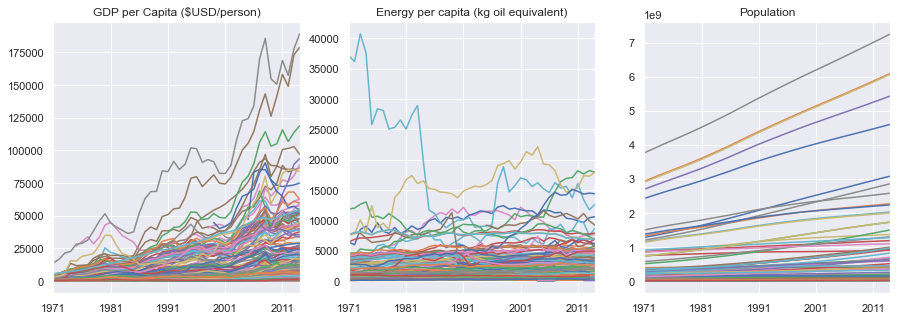

In [9]:
figure, axes = plt.subplots(1, 3)
(gdp/population).T.plot(ax=axes[0], legend= False, figsize=(15,5), title = 'GDP per Capita ($USD/person)')
energy.T.plot(ax=axes[1], legend= False, figsize=(15,5), title = 'Energy per capita (kg oil equivalent)')
population.T.plot(ax=axes[2], legend=False, figsize=(15,5), title = 'Population')

#### It appears to be more complicated using per capita values. Total GDP and Total Energy consumption per country will be displayed instead

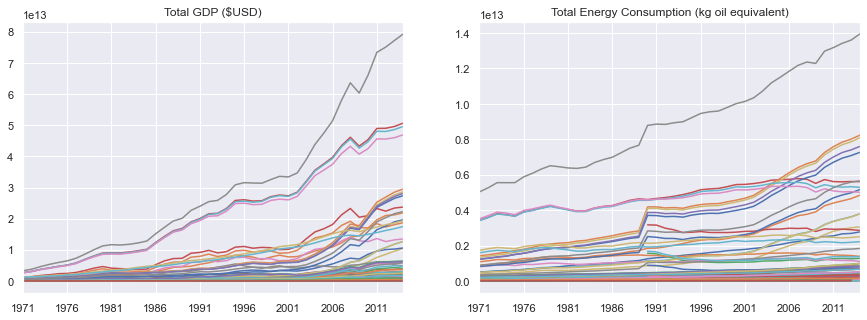

In [10]:
figure, axes = plt.subplots(1, 2)
gdp.T.plot(ax=axes[0], legend= False, figsize=(15,5), title = 'Total GDP ($USD)')
(energy*population).T.plot(ax=axes[1], legend=False, title = 'Total Energy Consumption (kg oil equivalent)')

#### It indeed provided a clearer trend compared to Per capita values. It is also as expected that most countries increased their total GDP and Total Energy Consumption over time

#### It is interesting to note that, there are quite a few downward trends if Per Capita values were used instead. Thus, even though there is an upward trend, for some countries, it does not always translate to an increase in quality of life for each person. It will further be proven below.

#### We will find the Pearson correlation coefficients of GDP and Energy against Population, then we will compare between the total values and per capita values. 

In [11]:
# Determine the Pearson CC for (GDP vs Population) and (Energy Consumption vs Population) Total and Per Capita values
#Per Capita values
pop_eng = population.corrwith(energy, axis=1)
pop_gdp = population.corrwith(gdp/population, axis=1)

#Total values
pop_eng_tot = population.corrwith(energy*population, axis=1)
pop_gdp_tot = population.corrwith(gdp, axis=1)

#### The code above will produce the Pearson CC value for each country, representing the correlation between GDP and Energy with Population. 

#### To compare the Total values and Per Capita values, we will plot the Pearson CC values in various graphs. 

#### It is gererally accepted that for a pair of variables that has Pearson CC >= 0.7, they are considered to have a strong positive correlation. Thus, we will also calulatte the percentage of Pearson CC values >= 0.7

C:\Users\smd_l\Anaconda3\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\smd_l\Anaconda3\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


                          0.43                                                                 0.66


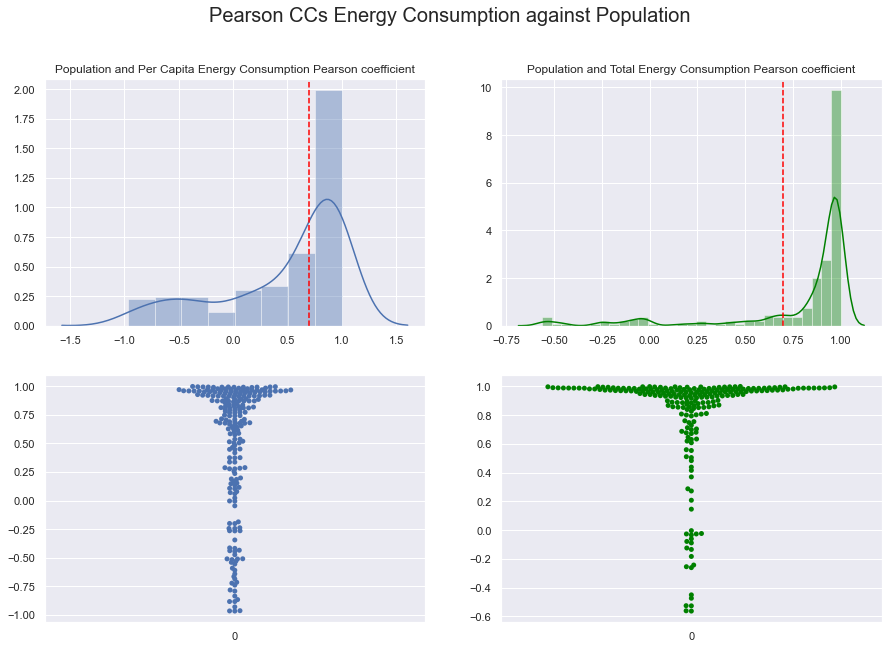

In [12]:
plt.figure(figsize = (15,10))

plt.subplot(2,2,1)
sns.distplot(pop_eng.dropna())
plt.title('Population and Per Capita Energy Consumption Pearson coefficient')
plt.axvline(0.7, linestyle='--', color='red')


plt.subplot(2,2,2)
sns.distplot(pop_eng_tot.dropna(), color='green')
plt.title('Population and Total Energy Consumption Pearson coefficient')
plt.axvline(0.7, linestyle='--', color='red')

plt.subplot(2,2,3)
sns.swarmplot(data=pop_eng)

plt.subplot(2,2,4)
sns.swarmplot(data=pop_eng_tot, color='green')

plt.suptitle('Pearson CCs Energy Consumption against Population', size=20)

print('                         ',(np.sum(pop_eng>=0.7)/len(pop_eng)).round(2), '                                                               ', 
      (np.sum(pop_eng_tot>=0.7)/len(pop_eng_tot)).round(2) )

C:\Users\smd_l\Anaconda3\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\smd_l\Anaconda3\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


                          0.79                                                                    0.85


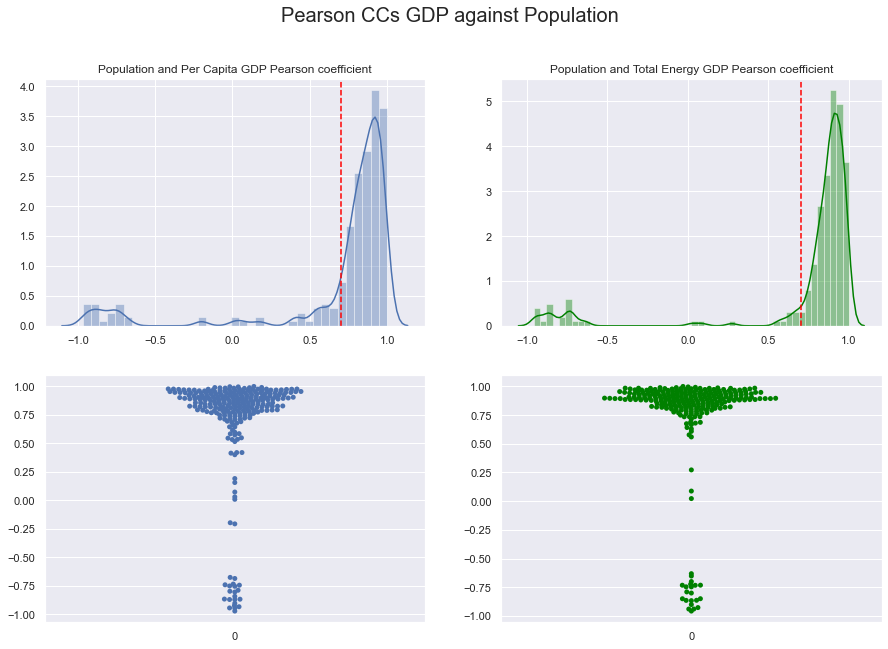

In [13]:
# Inspecting the correlation coefficient numbers with various visualization (scattered plot, ECDF plot, boxplot and bee swarm)
_ = plt.figure(figsize = (15,10))

plt.subplot(2,2,1)
sns.distplot(pop_gdp.dropna())
plt.title('Population and Per Capita GDP Pearson coefficient')
plt.axvline(0.7, linestyle='--', color='red')


plt.subplot(2,2,2)
sns.distplot(pop_gdp_tot.dropna(), color='green')
plt.title('Population and Total Energy GDP Pearson coefficient')
plt.axvline(0.7, linestyle='--', color='red')

plt.subplot(2,2,3)
sns.swarmplot(data=pop_gdp)

plt.subplot(2,2,4)
sns.swarmplot(data=pop_gdp_tot, color='green')

plt.suptitle('Pearson CCs GDP against Population', size=20)

print('                         ', (np.sum(pop_gdp>=0.7)/len(pop_gdp)).round(2), '                                                                  ', 
      (np.sum(pop_gdp_tot>=0.7)/len(pop_gdp_tot)).round(2))

#### There are 23% more countries that have positive correlation between Energy Consumption vs. Population, while there are 6% more countries that have positive correlation between GDP vs. Population. We can come to a conclusion that although, from 1960 - 2014, an overall upward trend GDP and Energy Consumption as a whole, it does not always translate to the improvement in quality of life for some countries. 

# Building a forecasting model for the World using FBProphet and scikit-learn

The above analysis shows that most countries' GDP and Total Energy Consumption have strong positive correlation against their population. Although, there are extreme cases and outliers, most Pearson CC values gather above 0.5 portion of the beeswarm plots. It can be expected that cummulatively as a whole, the world has its GDP, Energy Consumption and Population increase over time. By building forecast modell using the World data, we can smooth out some of the roughness. 

The next part, we will further investigate the World data. First, we need to extract World data from our DataFrame

In [14]:
    w_pop = population.loc['World']
    w_gdp = gdp.loc['World']
    w_eng = energy.loc['World']*w_pop

By plotting GDP, Energy Consumption and Population time series data, we can visualize their development from 1960 - 2014

[Text(0, 0.5, 'Total Energy Consumption (kg oil equivalent)'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'World Total Energy Consumption')]

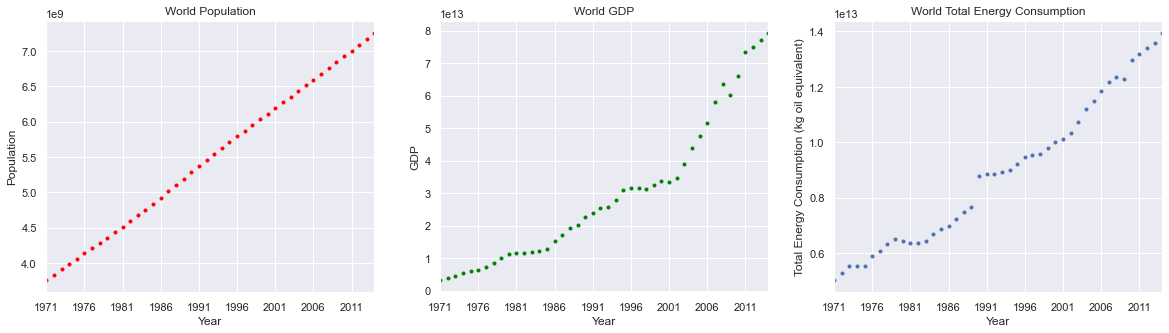

In [15]:
_ = plt.figure(figsize = (20,5))

plt.subplot(1, 3, 1)
_ = w_pop.plot(marker='.', linestyle='none', color='red')
_.set(xlabel='Year', ylabel='Population', title='World Population')

plt.subplot(1, 3, 2)
_ = w_gdp.plot(marker='.', linestyle='none', color='green')
_.set(xlabel='Year', ylabel='GDP', title='World GDP')

plt.subplot(1, 3, 3)
_ = (w_eng).plot(linestyle='none', marker='.')
_.set(xlabel='Year', ylabel='Total Energy Consumption (kg oil equivalent)', title='World Total Energy Consumption')

By visualizing the plots above, building a linear regression model on Population vs. Time perhaps would be the most accurate. We can actually prove that using statistic analysis. 

For each time series plot, we can determine the Pearson CC value for each of them and its associated p-value. The Null Hypothesis: each variable (GDP, Energy Consumption and Population) is completely independent from time. 

In [16]:
#Determining Pearson CCs and their associated p-values:
print('Population: ', stats.pearsonr(w_pop.index.astype(int), w_pop.values))
print('GDP: ', stats.pearsonr(w_gdp.index.astype(int), w_gdp.values))
print('Energy consumption: ', stats.pearsonr(w_eng.index.astype(int), w_eng.values))

Population:  (0.9998558720472559, 5.5268229023463806e-76)
GDP:  (0.9547846113203808, 9.571101092291885e-24)
Energy consumption:  (0.9881869305318465, 7.583571777760859e-36)


Population data has the strongest positive correlation with time. Furthermore, its associated p-value is in the range of (e-76), obviously significantly smaller than conventially chosen alpha = 0.05. Thus, we can reject the Null Hypothesis and accept the alternate ones: it does not happen by chance that Population is strongly correlated to time. 

## Using FB Prophet to build model forecasting world population

Prophet requires that time column to be named 'ds' while value column to be named 'y'. Creating new DataFrame pop

In [17]:
pop = w_pop
pop = pop.reset_index()
pop = pop.rename(columns={'index':'ds', 'World':'y'})
pop['y'] = pop['y']/1e9

In [18]:
pop.head()

,ds,y
0,1971,3.761307
1,1972,3.837726
2,1973,3.913218
3,1974,3.989385
4,1975,4.063807


In [19]:
pop_prophet = fbprophet.Prophet(changepoint_prior_scale=0.15)
pop_prophet.fit(pop)
pop_forecast = pop_prophet.make_future_dataframe(periods=17, freq='Y')
pop_forecast = pop_prophet.predict(pop_forecast)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


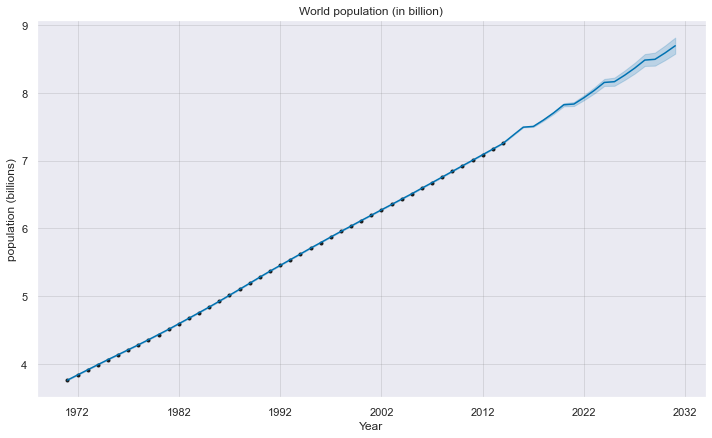

In [20]:
pop_prophet.plot(pop_forecast, xlabel = 'Year', ylabel = 'population (billions)')
plt.title('World population (in billion)');

## Using scikit-learn

In [21]:
from sklearn.linear_model import LinearRegression
# This creates a LinearRegression object
X = pop.drop('y', axis=1)
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
lm.fit(X, pop.y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: -158.2677759870627


In [24]:
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,ds,0.082185


In [25]:
sk_predict = pd.DataFrame(lm.predict(np.arange(1971, 2032, 1).reshape(-1,1)))
sk_predict = sk_predict.set_index(np.arange(1971, 2032, 1))
sk_predict = sk_predict.rename(columns={0:'sk_predict'})

Text(0, 0.5, 'Population (in billion)')

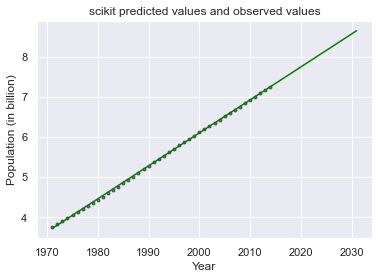

In [26]:
plt.plot(w_pop.index.astype(int), (w_pop.values)/1e9, marker='.', linestyle='none', color='black', alpha=0.5)
plt.plot(sk_predict.index, sk_predict.values, color='green')
plt.title('scikit predicted values and observed values')
plt.xlabel('Year')
plt.ylabel('Population (in billion)')

## Comparing prophet and scikit-learn

In [27]:
fbprophet_ = pd.DataFrame(pop_forecast.yhat)

In [28]:
fbprophet_ = fbprophet_.set_index(np.arange(1971, 2032, 1).astype(int))

Text(0.5, 1.0, 'Comparing scikit and prophet predicted values')

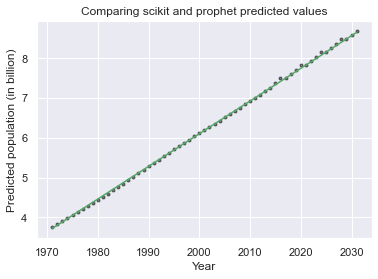

In [29]:
plt.plot(fbprophet_, marker='.', linestyle='none', color='black', alpha=0.5)
plt.plot(sk_predict, color='g')
plt.xlabel('Year')
plt.ylabel('Predicted population (in billion)')
plt.title('Comparing scikit and prophet predicted values')

In [30]:
from sklearn.metrics import mean_squared_error

In [31]:
print('RMSE scikit: ', mean_squared_error(w_pop/1e9, sk_predict.loc['1971':'2014']))
print('RMSE prophet: ', mean_squared_error(w_pop/1e9, fbprophet_.loc['1971':'2014']))

RMSE scikit:  0.0003140226644967436
RMSE prophet:  2.362965878777551e-07


## Forecasting model for Energy Consumption and GDP development based on the forecasting values of population

In [32]:
w = w_pop/1e9

In [33]:
w = pd.DataFrame(w)
w = w.rename(columns={0:'Pop'})
w['Energy'] = w_eng/1e12
w['GDP'] = w_gdp/1e12

In [34]:
w = w.rename(columns={'World':'Pop'})

In [35]:
w.head()

,Pop,Energy,GDP
1971,3.761307,5.028880,3.278241
1972,3.837726,5.264669,3.783201
1973,3.913218,5.549511,4.616070
1974,3.989385,5.547240,5.323823
1975,4.063807,5.549542,5.929260


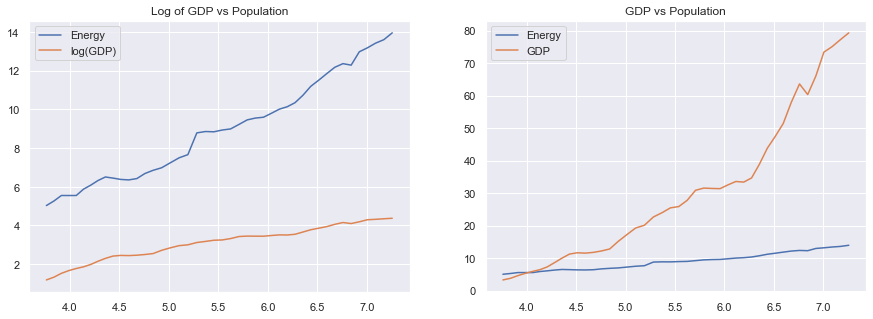

In [36]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(w.Pop, w.Energy )
plt.plot(w.Pop, np.log(w.GDP))
plt.title('Log of GDP vs Population')
plt.legend(('Energy','log(GDP)'))

plt.subplot(1,2,2)
plt.plot(w.Pop, w.Energy )
plt.plot(w.Pop, w.GDP)
plt.title('GDP vs Population')
plt.legend(('Energy','GDP'))

In [37]:
w['log_gdp'] = np.log(w.GDP)

In [38]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [39]:
m_log_gdp = ols('log_gdp ~ Pop', w).fit()
print(m_log_gdp.summary())

                            OLS Regression Results                            
Dep. Variable:                log_gdp   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1278.
Date:                Tue, 28 Jul 2020   Prob (F-statistic):           4.48e-33
Time:                        00:05:14   Log-Likelihood:                 19.379
No. Observations:                  44   AIC:                            -34.76
Df Residuals:                      42   BIC:                            -31.19
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.4441      0.129    -11.229      0.0

In [40]:
m_eng = ols('Energy ~ Pop', w).fit()
print(m_eng.summary())

                            OLS Regression Results                            
Dep. Variable:                 Energy   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     1882.
Date:                Tue, 28 Jul 2020   Prob (F-statistic):           1.63e-36
Time:                        00:05:14   Log-Likelihood:                -20.762
No. Observations:                  44   AIC:                             45.52
Df Residuals:                      42   BIC:                             49.09
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.7415      0.320    -14.806      0.0